In [84]:
import pandas as pd

df_path = '../result/vis/freq_gap.csv'
freq_df = pd.read_csv(df_path)
#freq_gap_df['index'] = freq_gap_df.index
print(freq_df)

       char         value     value_label  index
0         ，  84225.000000         ai_freq      0
1         ，  91986.000000      human_freq      0
2         ，     -0.092146  freq_ratio_gap      0
3         ，      0.092146  freq_gap_score      0
4         的  40200.000000         ai_freq      1
5         的  51469.000000      human_freq      1
6         的     -0.280323  freq_ratio_gap      1
7         的      0.280323  freq_gap_score      1
8         。  32071.000000         ai_freq      2
9         。  30725.000000      human_freq      2
10        。      0.041969  freq_ratio_gap      2
11        。      0.043808  freq_gap_score      2
12        了  26822.000000         ai_freq      3
13        了  27729.000000      human_freq      3
14        了     -0.033816  freq_ratio_gap      3
15        了      0.033816  freq_gap_score      3
16        一  15279.000000         ai_freq      4
17        一  25793.000000      human_freq      4
18        一     -0.688134  freq_ratio_gap      4
19        一      0.6

/root/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/root/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/root/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

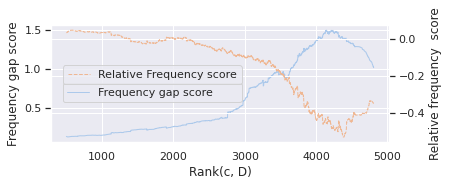

In [402]:
import pdb
import seaborn as sns
import matplotlib.pyplot as plt

freq_gap_score_ma_df = freq_df[freq_df['value_label'].isin({'freq_gap_score'})]
freq_gap_score_ma_df['value'] = freq_gap_score_ma_df['value'].rolling(window=500).mean()
freq_gap_score_ma_df['value_label'] = 'absolute gap score'

freq_gap_ratio_ma_df = freq_df[freq_df['value_label'].isin({'freq_ratio_gap'})]
freq_gap_ratio_ma_df['value'] = freq_gap_ratio_ma_df['value'].rolling(window=500).mean()
freq_gap_ratio_ma_df['value_label'] = 'relative score to AI'

plot_df = pd.concat([freq_gap_score_ma_df, freq_gap_ratio_ma_df])

# plot_df = pd.concat([freq_gap_df, freq_gap_score_ma_df])
sns.set(rc={'figure.figsize':(6.4, 2.5)})
#print(plot_df)

# freq_gap_df['freq_ratio_gap_MA'] = freq_gap_df['freq_ratio_gap'].rolling(window=100).mean()
# freq_gap_df['freq_gap_score_MA'] = freq_gap_df['freq_gap_score'].rolling(window=500).mean()
# fig, ax = plt.subplots(3, 2, sharex=True)
ax1 = sns.lineplot(data=freq_gap_score_ma_df, x="index", y="value", color='#ACC9EB', linewidth=1)
ax2 = ax1.twinx()
sns.lineplot(data=freq_gap_ratio_ma_df, x="index", y="value", ax=ax2, color='#EFB793', linewidth=1)
ax2.set(ylabel='Relative frequency  score')
ax2.lines[0].set_linestyle("--")
# ax1.set_title("The difference between the frequency of chars used in AI and human writing")
# ax1.set(xlabel='The rank of char frequency', ylabel='Frequency gap score')
ax1.set(xlabel='Rank(c, D)', ylabel='Frequency gap score')
print(legend_labels)
ax1.legend(bbox_to_anchor=(0.58, 0.55), labels=['Frequency gap score       '])
ax2.legend(bbox_to_anchor=(0.58, 0.7), labels=['Relative Frequency score'])
plt.tight_layout()
plt.savefig('exp_frequency_diff_subfig1.pdf')
plt.show()

[12, 25, 38, 51, 64, 77, 90, 103, 116, 129, 142, 155, 168, 181, 194, 207, 220, 233, 246, 259, 272, 285, 298, 311, 324, 337, 349, 362, 375, 388, 401, 414, 427, 440, 453, 466, 479, 492, 505, 518, 531, 544, 557, 570, 583, 596, 609, 622, 635, 648, 661, 674, 686, 699, 712, 725, 738, 751, 764, 777, 790, 803, 816, 829, 842, 855, 868, 881, 894, 907, 920, 933, 946, 959, 972, 985, 998, 1011, 1024]
human_text_avg_len: 103.88350134885702, ai_text_avg_len: 103.51184733257662


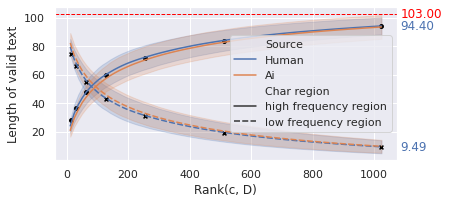

/root/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/root/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Index(['char_freq_range', 'classifier_name', 'dataset_name',
       'is_change_apply_to_test', 'is_change_apply_to_train', 'repeat_i',
       'semantic_change', 'test_acc', 'test_f1', 'test_loss', 'test_size',
       'train_loss', 'train_size', 'val_size'],
      dtype='object')
(210, 14)


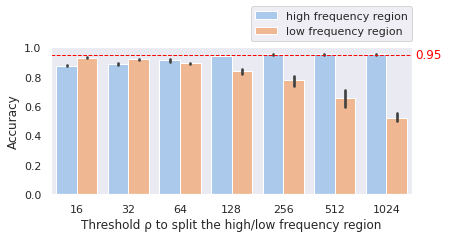

In [405]:
df_path = '../result/vis/char_range_seq_length.csv'
char_range_seq_len_df = pd.read_csv(df_path)
#print(char_range_seq_len_df)
print(sorted(set(char_range_seq_len_df['char_index'])))
# print(char_range_seq_len_df)
char_index_thresh = 2000
avg_text_length = 103
# human_text_avg_len = char_range_seq_len_df[(char_range_seq_len_df['value_label']=='human') & (char_range_seq_len_df['char_index']==5606) & (char_range_seq_len_df['type']=='use_top')]['value'].mean()
# ai_text_avg_len = char_range_seq_len_df[(char_range_seq_len_df['value_label']=='ai') & (char_range_seq_len_df['char_index']==5606) & (char_range_seq_len_df['type']=='use_top')]['value'].mean()

print(f"human_text_avg_len: {human_text_avg_len}, ai_text_avg_len: {ai_text_avg_len}")

def tmp_func(x):
    if x == 'tail freq':
        return 'low frequency region'
    elif x == 'top freq':
        return 'high frequency region'
char_range_seq_len_df['type'] = char_range_seq_len_df['type'].apply(tmp_func)

char_range_seq_len_df_top = char_range_seq_len_df[char_range_seq_len_df['type']=='high frequency region']
char_range_seq_len_df_top = char_range_seq_len_df_top[char_range_seq_len_df_top['char_index'] < char_index_thresh]

char_range_seq_len_df_tail = char_range_seq_len_df[char_range_seq_len_df['type']=='low frequency region']
char_range_seq_len_df_tail = char_range_seq_len_df_tail[char_range_seq_len_df_tail['char_index'] < char_index_thresh]

import seaborn as sns
import matplotlib.pyplot as plt

plot_df = pd.concat([char_range_seq_len_df_top, char_range_seq_len_df_tail])

# plt.subplots(nrows=2, figsize=(6.4, 7))
sns.set(rc={'figure.figsize':(6.4, 3)})

# , palette = [sns.color_palette("Set2", 10)[3] , sns.color_palette("Set2", 10)[9]]
plot_df['Source'] = plot_df['value_label']
plot_df['Char region'] = plot_df['type']
ax = sns.lineplot(x="char_index", y="value", data=plot_df, hue='Source', ci='sd', style='Char region')
ax.axhline(avg_text_length, ls='--', color='red', linewidth=1)

ax.scatter(16, 28,  marker='o',    s=15, color='black')
ax.scatter(32, 37,  marker='o',    s=15, color='black')
ax.scatter(64, 48,  marker='o',    s=15, color='black')
ax.scatter(128, 60, marker='o',    s=15, color='black')
ax.scatter(256, 72, marker='o',    s=15, color='black')
ax.scatter(512, 84, marker='o',    s=15, color='black')
ax.scatter(1024, 94.4, marker='o', s=15, color='black')

ax.scatter(16, 75,  marker='x',    s=15, color='black')
ax.scatter(32, 66,  marker='x',    s=15, color='black')
ax.scatter(64, 55,  marker='x',    s=15, color='black')
ax.scatter(128, 43, marker='x',    s=15, color='black')
ax.scatter(256, 31, marker='x',    s=15, color='black')
ax.scatter(512, 19, marker='x',    s=15, color='black')
ax.scatter(1024,9.49, marker='x',  s=15, color='black')

# ax.set_title("How eliminating chars based on frequency rank affects valid text length")
ax.set(xlabel='Rank(c, D)', ylabel='Length of valid text')
# ax.set(xticklabels=[])
# ax.set(xlabel=None)

# import pdb
# pdb.set_trace()
annotate_lines = ax.lines[:2] + [ax.lines[10]]
for l in annotate_lines:
    y = l.get_ydata()
    if len(y)>0:
        ax.annotate(f'{y[-1]:.2f}', xy=(1.01,y[-1]), xycoords=('axes fraction', 'data'), 
                     ha='left', va='center', color=l.get_color())
        
# ax.legend(bbox_to_anchor=(1.0, 1.04), loc=4, borderaxespad=0.)
# ax.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig('exp_frequency_diff_subfig2.pdf')
plt.show()

# sns.lineplot(x="char_index", y="value", data=plot_df, hue='value_label', ci='sd', style='type')
# plt.show()

# ------------------------------------------------------------------------------------------------------------------------------
sns.set(rc={'figure.figsize':(6.4, 3.5),'axes.grid' : False})

all_files = glob.glob(os.path.join('../result/', '*.csv'))
all_df = pd.concat([pd.read_csv(x) for x in all_files])
all_keys = all_df.keys()
print(all_keys)
df = all_df[all_df['semantic_change'].isin({'rm_chars_in_freq', 'rm_chars_out_freq'})]

def tmp_func(x):
    if x == 'rm_chars_in_freq':
        return 'low frequency region'
    elif x == 'rm_chars_out_freq':
        return 'high frequency region'

df['semantic_change'] = df['semantic_change'].apply(tmp_func)

print(df.shape)
# print(df)

plot_df = pd.DataFrame(df)
# pastel
# 
ax = sns.barplot(data=plot_df, x="char_freq_range", y="test_acc", hue="semantic_change", palette = 'pastel')
ax.axhline(0.95, ls='--', color='red', linewidth=1)

annotate_lines = ax.lines[14:]
for l in annotate_lines:
    y = l.get_ydata()
    if len(y)>0:
        ax.annotate(f'{y[-1]:.2f}', xy=(1.01,y[-1]), xycoords=('axes fraction', 'data'), 
                     ha='left', va='center', color=l.get_color())
# ax.set(xlabel='The rank of char frequency', ylabel='Accuracy')

ax.set(xlabel='Threshold ρ to split the high/low frequency region', ylabel='Accuracy')

ax.legend(bbox_to_anchor=(1.0, 1.04), loc=4, borderaxespad=0.)
# ax.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig('exp_frequency_diff_subfig3.pdf')
plt.show()